<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea17_electrical_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from math import sqrt
from scipy import stats
import random

In [2]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path        = 'https://drive.google.com/uc?export=download&id=' 
URL_Demanda = 'https://drive.google.com/file/d/1xcpXDTE7H6EBMLOkic5lq-lzSwiLG2ZS/view?usp=sharing'
df_Demanda  = pd.read_csv(path + URL_Demanda .split('/')[-2], usecols=[0] ) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,], 1,2,3,4,5,6,7,8,9,10,11,12,13,15,
df_Demanda.dropna(inplace=True)
serie = df_Demanda.to_numpy()
serie = serie.ravel() ## Con esto quitamos el bracket o corchete en cada uno de loselementos del arreglo

## Una red de juguete con Networkx

In [3]:
## https://github.com/urieliram/statistical/blob/main/Tarea13.ipynb
#serie = [1,1,7,7,9,8,1,8,7,0,2,7,6,1,1,6,6,5,9,2,7,9,0,1,2,9,7,9,2,0,7,5,5,5,5,7,9
#,9,0,7,5,5,6,0,4,3,5,5,3,5,0,2,0,5,0,5,6,4,3,4,9,2,6,2,8,0,4,7,6,5,2,0,3,2
#,3,0,6,2,6,6,4,5,0,6,1,4,9,6,0,3,6,9,5,0,2,4,3,5,0,5,6,4,5,5,0,3,2,0,2,1,7
#,3,3,2,5,3,5,7,5,1,3,5,9,4,6,6,5,2,0,4,0,5,0,7,2,1,5,9,5,7,4,0,3,4,5,4,0,5
#,2,2,5,4,9,7,6,0,5,5,5,5,0,0,3,5,2,2,3,9,5,7,5,3,5,9,5,4,0,2,4,4,6,1,0,5,0
#,5,0,7,0,0,0,0,2,4,4,3,0,4,3,0,2,6,0,6,5,2,6,5,0,5,5,0,2,2,5,2,4,9,0,2,5,6
#,1,0,0,0,5,8,0,5,3,0,0,3,5,0,0,2,5,2,7,2,5,0,4,5,6,9,0,5,4,0]

serie = [1,1,7,7,9,8,1,8,7,0,2,7,6,1,1,6,6,5,9,2,7,9,0,1,2,9,7,9,2,0,7,5,5,5,5,7,
         9,9,0,7,5,5,6,0,4,3,5,5,5,5,0,2,0,5,5,5,6,4,3,4,9,2,6,2,8,0,4,7,6,5,2,0,
         3,2,0,0,6,2,6,6,4,5,0,6,1,4,9,6,0,3,6,9,5,0,2,4,3,5,0,5,6,4,5,5,0,3,2,0,
         2,1,7,3,5,2,5,3,5,6,5,1,3,5,9,4,6,6,5,2,0,4,0,5,0,7,2,1,5,9,5,7,3,0,3,4,
         5,3,0,5,2,2,5,4,9,7,6,0,5,5,5,5,0,0,3,5,2,5,3,9,5,7,5,3,5,9,5,4,0,2,4,4,
         6,1,0,5,0,5,0,7,0,0,0,0,2,4,4,3,0,4,3,0,2,6,0,6,5,2,6,5,0,5,5,0,2,2,5,2,
         4,9,0,2,5,6,1,0,0,0,5,8,0,5,3,0,0,3,5,0,0,5,5,5,7,2,5,0,4,5,6,0,0,5,4,0]


In [55]:
nodes = np.unique(serie)
n = len(nodes)
A = np.zeros(shape=(n,n))

In [81]:
#for i in range(len(serie)-1):
#    A[serie[i],serie[i+1]] = A[serie[i],serie[i+1]] + 1
for i in range(len(serie)-1):
    A[serie[i],serie[i+1]] = A[serie[i],serie[i+1]] + 1
A

array([[ 70.,   7.,  63.,  42.,  35.,  84.,  21.,  28.,   0.,   0.],
       [ 14.,  14.,   7.,   7.,   7.,   7.,   7.,  14.,   7.,   0.],
       [ 42.,  14.,  14.,   0.,  28.,  42.,  28.,  14.,   7.,   7.],
       [ 35.,   0.,  14.,   0.,  14.,  56.,   7.,   0.,   0.,   7.],
       [ 21.,   0.,   0.,  35.,  14.,  28.,  14.,   7.,   0.,  28.],
       [ 91.,   7.,  49.,  35.,  21., 112.,  42.,  28.,   7.,  28.],
       [ 35.,  28.,  14.,   0.,  21.,  42.,  21.,   0.,   0.,   7.],
       [ 14.,   0.,  14.,  14.,   0.,  21.,  21.,   7.,   0.,  28.],
       [ 14.,   7.,   0.,   0.,   0.,   0.,   0.,   7.,   0.,   0.],
       [ 21.,   0.,  21.,   0.,   7.,  28.,   7.,  14.,   7.,   7.]])

In [82]:
#G = nx.Graph()
G = nx.DiGraph()
G.add_nodes_from(nodes)

In [85]:
rows = A.shape[0]
cols = A.shape[1]
for i in range(0, cols):
    for j in range(0, rows):
        if A[i,j] != 0:
            G.add_edge(i,j,color='c',weight=A[i,j]/15 )

colors  = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()

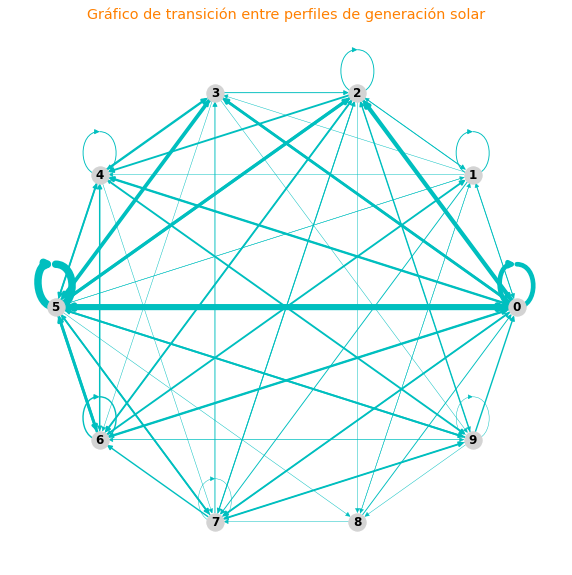

In [93]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
#subax1 = plt.subplot(121,figsize=(15,15))
#nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
fig, ax1 = plt.subplots(figsize=(10,10))
title_='Gráfico de transición entre perfiles de generación solar'
if 1==1:
    plt.title(title_,fontsize='x-large',color=LETRASNARA) 

pos = nx.circular_layout(G)
nx.draw(G, pos, 
        edge_color=colors, 
        width=list(weights),
        with_labels=True,
        node_color='lightgray',
        font_weight='bold')
      
plt.savefig('fig_t17_grafo', transparent=True)         
plt.show()


[Creating a graph Networkx](https://networkx.org/documentation/stable/tutorial.html)

[Drawing graphs Networkx](https://networkx.org/documentation/stable/tutorial.html#drawing-graphs)

[A study of visibility graphs for time series representations](https://upcommons.upc.edu/bitstream/handle/2117/328691/152711.pdf?sequence=1&isAllowed=y)

In [9]:
 pip install pandapower

In [10]:
pip install python-igraph

In [11]:
pip install igraph

In [12]:
pip install haversine

In [13]:
pip install pyproj

## Una red con Pandapower
**Nodos**
0.   Número de bus.
1.   Nombre completo del bus.
2.   Nombre abreviado del bus.
3.   Número del área.
4.   Nombre del área completo.
5.   Nombre del área abreviado.
6.   Tensión nominal (KV). (F
7.   Subsistema eléctrico.
8.   Nombre completo de región de precios.
9.   Nombre abreviado de región de precios.
10.  Número de la región de precios.
11.  Disponibilidad inicial del nodo.

**Ramas**
0.   Número de la rama.
1.   Nombre completo de la rama.
2.   Índice del nodo origen.
3.   Nombre del nodo origen.
4.   Índice del nodo destino.
5.   Nombre del nodo destino.
6.   Resistencia de la rama en pu.
7.   Reactancia de la rama en pu.
8.   Disponibilidad inicial de la rama.
9.   Tipos de rama (1: línea, 2: transformador).

**Cargas**
0.   Nombre de la carga.
1.   -
2.   -
3.   Número de nodo asociado.
4.   Bandera de nodo distribuido (1-Sí/0-No)
5.   Índice de archivo de los factores de distribución de carga (0-Ninguno/1,2,3…)

**Carga fija**
0.   Carga fija (MW) del periodo 1.
1.   Carga fija (MW) del periodo 168


In [14]:
path            = 'https://drive.google.com/uc?export=download&id=' 
URL_Nodos       = 'https://drive.google.com/file/d/1-IYKCtbbvDJNWTtb7Dyp4-rpn4AyGHcC/view?usp=sharing'
URL_Ramas       = 'https://drive.google.com/file/d/18gSw-z-8WeXSRdnIde_iSe0mJLFmaFWB/view?usp=sharing'
URL_Cargas      = 'https://drive.google.com/file/d/1--H0OVEU9mVZSkpB9U_JlbHgPLflWbY7/view?usp=sharing'
URL_Carfija     = 'https://drive.google.com/file/d/1tMUgnaIiC1vAx71YUcQPImc-ZsVtnUXw/view?usp=sharing'
df_Nodos  = pd.read_csv(path+URL_Nodos.split('/')[-2],usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],names=['No','Name','Avr','Region','Place','Place2','KV','Sub','Prices','Prices2','Price3','Avail','geo1','geo2'])
df_Nodos.dropna(inplace=True)
nodos = df_Nodos.to_numpy()
df_Ramas  = pd.read_csv(path+URL_Ramas.split('/')[-2],usecols=[0,1,2,3,4,5,6,7,8,9],names=['No','Name','Orig','NameOrig','Destino','NameDest','R','X','Type','Avail'])
df_Ramas.dropna(inplace=True)
ramas = df_Ramas.to_numpy()
df_Cargas  = pd.read_csv(path+URL_Cargas.split('/')[-2],usecols=[0,1,2,3,4,5],names=['Name','x','xx','Node','Ban','Dist'])
df_Cargas.dropna(inplace=True)
cargas = df_Cargas.to_numpy()
df_Carfija  = pd.read_csv(path+URL_Carfija.split('/')[-2],usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],names=['H0','H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12','H13','H14','H15','H16','H17','H18','H19','H20','H21','H22','H23'])
df_Carfija.dropna(inplace=True)
carfijas = df_Carfija.to_numpy()

In [ ]:
df_Nodos['Prices'].unique()

In [16]:
import pandapower as pp
import igraph
from pandapower.plotting.plotly.mapbox_plot import set_mapbox_token
set_mapbox_token('pk.eyJ1IjoidXJpZWxpcmFtIiwiYSI6ImNsM2hnNm0yaDBtYzUzY28zbWd1czZwa2YifQ.YHsBHUVk4XMTgPFYRkF-Gw')

In [17]:
xgeo=13
ygeo=12

In [18]:
## http://www.pandapower.org/start/
net  = pp.create_empty_network(name='WEM', f_hz=60.0) ## Crea una red vacia
node = []
for i in nodos:                   
    loc1 =(i[xgeo]+random.randint(-10000,10000)/100000,i[ygeo]+random.randint(-10000,10000)/100000)
    node.append(pp.create_bus(net,vn_kv=i[6],name=i[1],geodata=loc1,zone=i[5],in_service=i[11])) ## https://pandapower.readthedocs.io/en/v2.9.0/elements/bus.html

In [19]:
j=0
for i in cargas:
    #print(cargas[j][3],carfijas[j][0],cargas[j][0])
    pp.create_load(net, bus=node[cargas[j][3]], p_mw=carfijas[j][0], q_mvar=0, name=cargas[j][0])
    j=j+1

In [20]:
import haversine as hs
import random
loc1 = (nodos[0][xgeo]+ random.randint(-10000,10000)/100000,nodos[0][ygeo]+ random.randint(-10000,10000)/100000)
loc2 = (nodos[3000][xgeo]+ random.randint(-10000,10000)/100000,nodos[3000][ygeo]+ random.randint(-10000,10000)/100000)
km   = hs.haversine(loc1,loc2)
km

127.06737140792472

In [21]:
import haversine as hs
for r in ramas:
    if r[8]==1:
        loc1 = (nodos[r[2]-1][xgeo]+random.randint(-10000,10000)/100000,nodos[r[2]-1][ygeo]+random.randint(-10000,10000)/100000)
        loc2 = (nodos[r[4]-1][xgeo]+random.randint(-10000,10000)/100000,nodos[r[4]-1][ygeo]+random.randint(-10000,10000)/100000)
        km   = hs.haversine(loc1,loc2)
        pp.create_line(net,from_bus=node[r[2]],to_bus=node[r[4]],std_type="NAYY 4x50 SE",name=r[1],length_km=km,in_service=r[9]) ## https://pandapower.readthedocs.io/en/v2.2.1/elements/line.html
    if r[8]==2:
        #print(r[0],node[r[2]-1],node[r[4]-1],r[1],r[9])
        pp.create_transformer(net, hv_bus=node[r[2]-1],lv_bus=node[r[4]-1],std_type="160 MVA 380/110 kV",name=r[1],in_service=r[9])

In [22]:
from pandapower.plotting.plotly import simple_plotly, vlevel_plotly, pf_res_plotly
import pyproj
## https://pandapower.readthedocs.io/en/v2.9.0/plotting/plotly/built-in_plots.html
## https://gis.stackexchange.com/questions/48949/epsg-3857-or-4326-for-googlemaps-openstreetmap-and-leaflet
# geo_data_to_latlong(net,projection='epsg:3857') epsg:3857 ## usada por google maps
simple_plotly(net,on_map=False,projection='epsg:3857',figsize=1,bus_size=5 ,map_style='light')

In [23]:
vlevel_plotly(net)

buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from the same voltage level does not have the same vn_kv !?
buses from

In [24]:
## Una red de ejemplo
## https://pandapower.readthedocs.io/en/develop/networks/power_system_test_cases.html
from pandapower.networks import mv_oberrhein,case30,case_ieee30,case57,case6470rte

net = case_ieee30()
net = case6470rte()
net = case30()
net = mv_oberrhein()

In [25]:
simple_plotly(net,on_map=True,projection='epsg:31467',figsize=1,bus_size=5 ,map_style='light')

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [26]:
pf_res_plotly(net)

In [27]:
pp.runpp(net) ## Flujos de potencia https://pandapower.readthedocs.io/en/v2.0.0/powerflow.html

[documentación pandapower.pdf](https://buildmedia.readthedocs.org/media/pdf/pandapower/v1.3.1/pandapower.pdf)

[A example notebook of pandapower](https://github.com/e2nIEE/pandapower/blob/master/tutorials/create_simple.ipynb)

[video de format PP](https://www.youtube.com/watch?v=4LQLZQWPaPM)

[standards transformers](https://pandapower.readthedocs.io/en/latest/std_types/basic.html#transformers)